In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sea
from scipy.stats import norm, binom
from etc import *

In [2]:
pwd

'/home/gavin/Boxcar/eda'

''

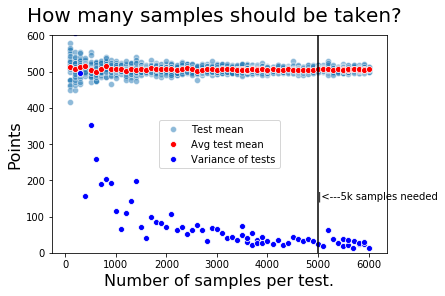

In [3]:
df = pd.read_csv('../game/data/batchtests.csv')
mean = df.groupby('batch_size').mean()
std = df.groupby('batch_size').var()
fig = plt.figure()
fig.ax = sea.scatterplot(
    df['batch_size'], 
    df['mean'], 
    alpha=.5,
    label='Test mean')
fig.ax = sea.scatterplot(mean['mean'].index,mean['mean'],color = 'r',label='Avg test mean')
fig.ax = sea.scatterplot(std['mean'].index,std['mean'],color='b',label='Variance of tests')
plt.ylim(bottom=0, top=600);
plt.legend()

fig.ax.set_ylabel('Points', fontsize=16)
fig.ax.set_xlabel('Number of samples per test.', fontsize=16)
fig.suptitle('How many samples should be taken?', fontsize=20)
fig.ax.axvline(5000, color='k')
fig.ax.text(5000,150, '|<---5k samples needed')
;

''

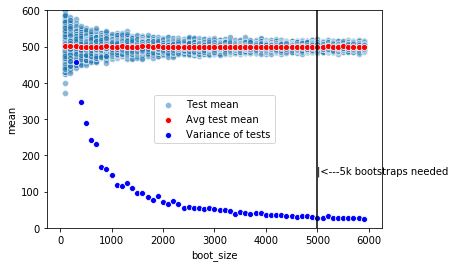

In [4]:
scores = pd.read_csv('../game/data/perfect.csv')
xplots = []
yplots = []
for bootstrap_size in range(100, 6000, 100):
    for plots in range(500):
        xplots.append(bootstrap_size)
        yplots.append(
            np.random.choice(
            a=scores['score'],
            size=bootstrap_size,
            replace=True).mean()
        )   
        
df = pd.DataFrame(zip(xplots, yplots), columns=['boot_size','mean'])
mean = df.groupby('boot_size').mean()
std = df.groupby('boot_size').var()

fig = plt.figure()
fig.ax = sea.scatterplot(xplots,yplots,alpha=.5,label='Test mean')
fig.ax = sea.scatterplot(mean['mean'].index,mean['mean'],color ='r',label='Avg test mean')
fig.ax = sea.scatterplot(std['mean'].index,std['mean'],color ='b',label='Variance of tests')
plt.ylim(bottom=0, top=600);
plt.legend()
fig.ax.axvline(5000, color='k')
fig.ax.text(5000,150, '|<---5k bootstraps needed')
;

In [42]:
def get_dist(df):
    mean = []
    std = []
    for _ in range(5000):
        boot = np.random.choice(a=df['score'],size=5000,replace=True)
        mean.append(boot.mean())
        std.append(boot.std())
    return norm(np.mean(mean), np.mean(std))


''

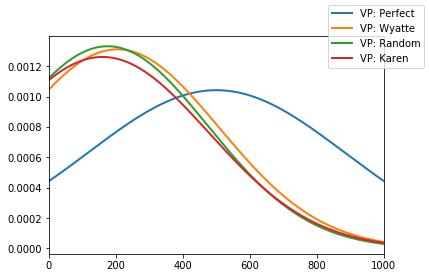

In [48]:
fig = plt.figure()
x = np.linspace(0, 1000, num=1000)

df = pd.read_csv('../game/data/perfect.csv')
fig.ax = plt.plot(x, get_dist(df).pdf(x), linewidth=2, label='VP: Perfect')

df1 = pd.read_csv('../game/data/wyatte.csv')
df1.score.where(df.outcome,0,inplace=True)
fig.ax = plt.plot(x, get_dist(df1).pdf(x), linewidth=2, label='VP: Wyatte')

df2 = pd.read_csv('../game/data/random.csv')
df2.score.where(df.outcome,0,inplace=True)
fig.ax = plt.plot(x, get_dist(df2).pdf(x), linewidth=2, label='VP: Random')

df3 = pd.read_csv('../game/data/karen.csv')
df3.score.where(df.outcome,0,inplace=True)
fig.ax = plt.plot(x, get_dist(df3).pdf(x), linewidth=2, label='VP: Karen')

plt.xlim(0,1000)
fig.legend()
;